In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
plt.style.use('seaborn-white')

In [2]:
ccdef = pd.read_excel('Default.xlsx') 

C:\Users\Anshika\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
ccdef.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [4]:
ccdef.shape

(10000, 5)

In [5]:
ccdef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [6]:
ccdef.isnull().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

In [7]:
pd.set_option('display.precision',2)


In [8]:
ccdef.describe()

,Unnamed: 0,balance,income
count,10000.00,10000.00,10000.00
mean,5000.50,835.37,33516.98
std,2886.90,483.71,13336.64
min,1.00,0.00,771.97
25%,2500.75,481.73,21340.46
50%,5000.50,823.64,34552.64
75%,7500.25,1166.31,43807.73
max,10000.00,2654.32,73554.23


In [9]:
(ccdef.balance == 0).sum(axis = 0)

499

In [10]:
ccdef.student.value_counts()


No     7056
Yes    2944
Name: student, dtype: int64

In [11]:
ccdef.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [12]:
ccdef['default2'] = ccdef.default.factorize()[0]

In [13]:
ccdef['student2'] = ccdef.default.factorize()[0]

In [14]:
ccdef.head(5)

,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,No,729.53,44361.63,0,0
1,2,No,Yes,817.18,12106.13,0,0
2,3,No,No,1073.55,31767.14,0,0
3,4,No,No,529.25,35704.49,0,0
4,5,No,No,785.66,38463.50,0,0


this code is run in single cell , because if we do that output is not showing according to us .

This code is run in single go .

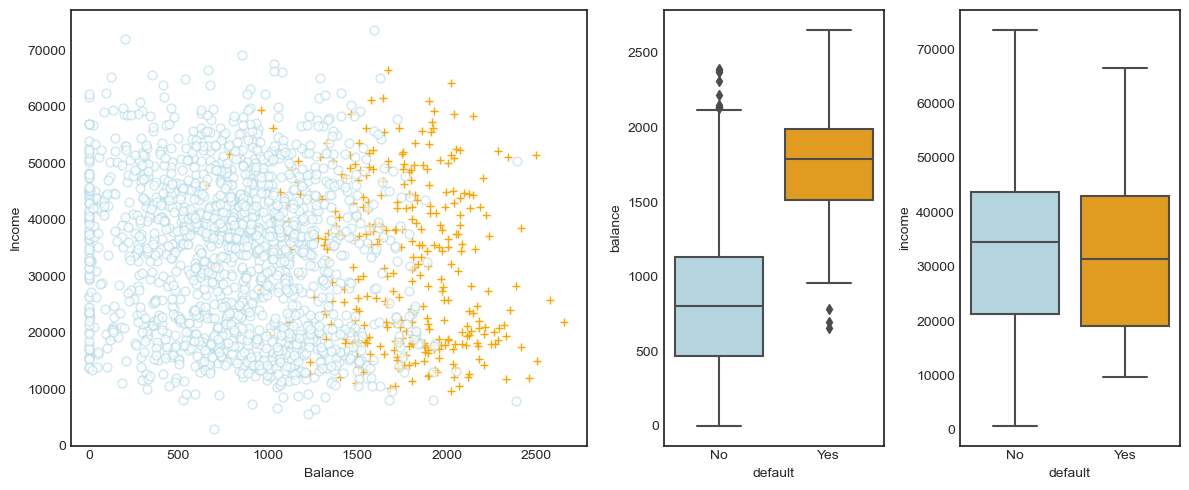

In [15]:


# Filtering data
ccdef_dfno = ccdef[ccdef.default2 == 0].sample(frac=0.15)
ccdef_dfyes = ccdef[ccdef.default2 == 1]
ccdef_df = pd.concat([ccdef_dfno, ccdef_dfyes])

# Enable inline plotting
%matplotlib inline  

# Creating figure and grid layout
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 4)

ax1 = plt.subplot(gs[0, :2])
ax2 = plt.subplot(gs[0, 2])
ax3 = plt.subplot(gs[0, 3])

# Define color palette
c_palette = {'Yes': 'orange', 'No': 'lightblue'}

# Scatter plot
ax1.scatter(ccdef_df[ccdef_df.default == 'Yes'].balance, 
            ccdef_df[ccdef_df.default == 'Yes'].income, 
            s=40, c='orange', marker='+', linewidths=1)

ax1.scatter(ccdef_df[ccdef_df.default == 'No'].balance, 
            ccdef_df[ccdef_df.default == 'No'].income, 
            s=40, marker='o', linewidths=1, edgecolors='lightblue', 
            facecolors='white', alpha=0.6)

ax1.set_ylim(ymin=0) 
ax1.set_ylabel('Income') 
ax1.set_xlim(xmin=-100)  
ax1.set_xlabel('Balance')

# Box plots
sns.boxplot(x='default', y='balance', data=ccdef, orient='v', ax=ax2, palette=c_palette)
sns.boxplot(x='default', y='income', data=ccdef, orient='v', ax=ax3, palette=c_palette)

# Adjust layout
plt.tight_layout()
plt.show()


 








In [16]:
x_train = ccdef.balance.values.reshape(-1,1)

In [17]:
y = ccdef['default2']

In [18]:
x_test = np.arange(ccdef.balance.min(),ccdef.balance.max()).reshape(-1,1)

In [19]:
import sklearn.linear_model as skl_lm

In [20]:
clf= skl_lm.LogisticRegression(solver= 'newton-cg')

In [21]:
clf.fit(x_train,y)

LogisticRegression(solver='newton-cg')

In [22]:
prob = clf.predict_proba(x_test)

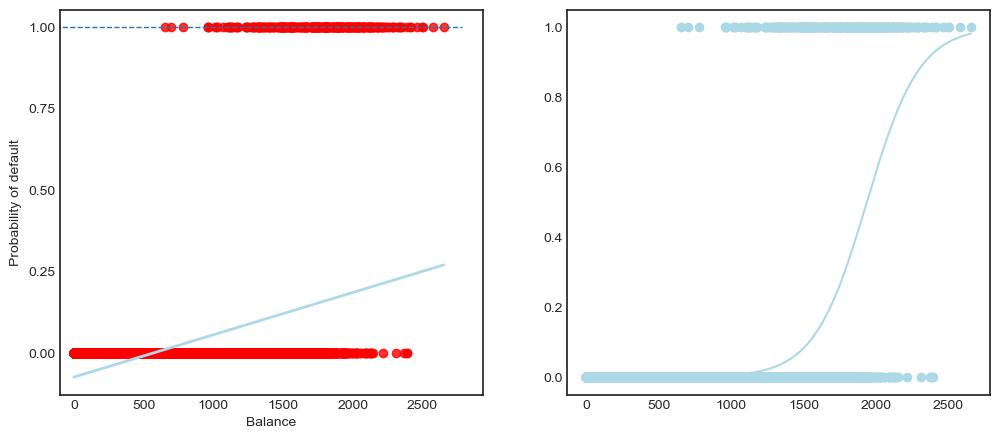

In [23]:
fig, (ax1,ax2)= plt.subplots(1,2, figsize =(12,5))

# First plot using seaborn
sns.regplot(
    x=ccdef['balance'],
    y=ccdef['default2'],
    order=1,
    ci=None,
    scatter_kws={'color': 'red'},
    line_kws={'color': 'lightblue', 'lw': 2},
    ax=ax1
)

# Second plot with matplotlib
ax2.scatter(x_train, y, color= 'lightblue')
ax2.plot(x_test, prob[:,1], color= 'lightblue')

# Format both plots
for ax in fig.axes:
    ax.hlines(1, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0,0.25,0.5,0.75,1.])
    ax.set_xlim(xmin=-100)
    plt.show()

In [24]:
print(clf)

LogisticRegression(solver='newton-cg')


In [25]:
print('classes: ',clf.classes_)

classes:  [0 1]


In [26]:
print('coefficients: ',clf.coef_)

coefficients:  [[0.00549891]]


In [27]:
print('intercept: ',clf.intercept_)

intercept:  [-10.65132658]


In [28]:
import statsmodels.api as sm 


In [29]:
import statsmodels.discrete.discrete_model as sms 

In [30]:
pd.set_option('display.precision',6)

In [31]:
x_train = sm.add_constant(ccdef.balance)


In [32]:
est = sm.Logit(y.ravel(),x_train).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [33]:
est.summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


In [34]:
x_train = sm.add_constant(ccdef.student2)

In [35]:
y= ccdef.default2

In [36]:
print(ccdef.groupby("student2")["default2"].value_counts(normalize=True))


student2  default2
0         0           1.0
1         1           1.0
Name: default2, dtype: float64


In [37]:
X_train = sm.add_constant(ccdef.drop(columns=["student2"]))


In [38]:
print(est.summary().tables[1].as_text())

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006


In [39]:
x_train = sm.add_constant(ccdef[['balance','income']])

In [40]:
est = sms.Logit(y, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


In [41]:
print(est.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05


In [42]:
x_train = ccdef[ccdef.student == 'Yes'].balance.values.reshape(-1,1)

In [43]:
y = ccdef[ccdef.student == 'Yes'].default2


In [44]:
x_train2 = ccdef[ccdef.student == 'No'].balance.values.reshape(-1,1)

In [45]:
y2 = ccdef[ccdef.student == 'No'].default2

In [46]:
x_test = np.arange(ccdef.balance.min(),ccdef.balance.max()).reshape(-1,1)

In [47]:
clf = skl_lm.LogisticRegression(solver= 'newton-cg')

In [48]:
clf2 = skl_lm.LogisticRegression(solver='newton-cg')

In [49]:
clf.fit(x_train,y)

LogisticRegression(solver='newton-cg')

In [50]:
clf2.fit(x_train2,y2)

LogisticRegression(solver='newton-cg')

In [51]:
prob = clf.predict_proba(x_test)

In [52]:
prob2=clf2.predict_proba(x_test)

In [53]:
ccdef.groupby(['student','default']).size().unstack('default')

default,No,Yes
student,,
No,6850,206
Yes,2817,127


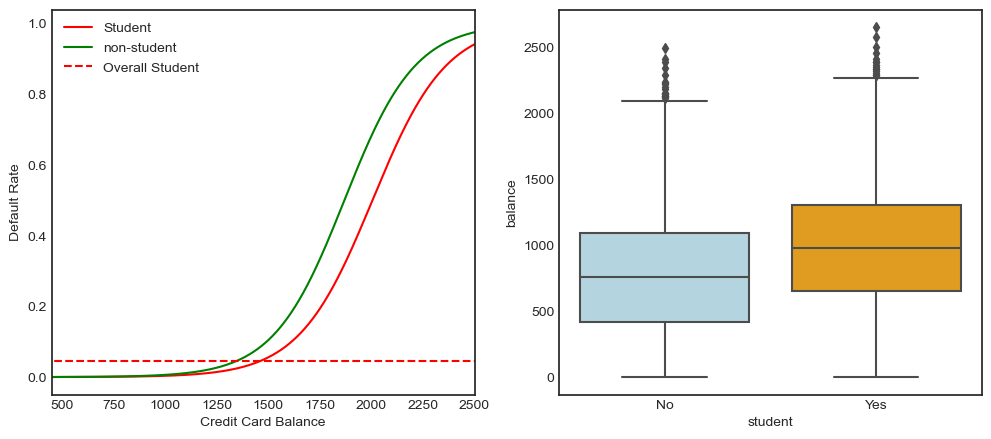

In [54]:
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(12,5))
ax1.plot(x_test, prob[:,1], color='red', label='Student')
ax1.plot(x_test, prob2[:,1], color='green', label='non-student')
ax1.hlines(127/2817, color='red', label='Overall Student', xmin=ax1.xaxis.get_data_interval()[0],xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')

ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Credit Card Balance')
ax1.set_yticks([0,0.2,0.4,0.6,0.8,1.])
ax1.set_xlim(450,2500)
ax1.legend(loc=2)

# Fixed boxplot
sns.boxplot(x='student',y='balance',data=ccdef, orient='v',ax=ax2,palette=c_palette)
plt.show()

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [56]:
x=ccdef[['balance','income','student2']]

In [57]:
y = ccdef['default2']



In [58]:
lda =  LinearDiscriminantAnalysis(solver='svd')

In [59]:
y_pred = lda.fit(x,y).predict(x)

In [60]:
ccdef_df = pd.DataFrame({'True default status': y, 'Predicted default status': y_pred})

In [61]:
ccdef_df.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

In [62]:
ccdef_df.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,9647,256
Yes,20,77


# 20% Threshold


In [63]:
decision_prob= 0.2

In [64]:
y_prob =lda.fit(x,y).predict_proba(x)

In [65]:
ccdef_df = pd.DataFrame({'True default status': y, 'Predicted default status': y_prob[:,1]>decision_prob})

In [66]:
ccdef_df.replace(to_replace={0:'No',1:'Yes','True': 'Yes','False':'No'}, inplace =True)

In [67]:
ccdef_df.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
False,9427,144
True,240,189


In [68]:
x = ccdef[['student2']]
y = ccdef['default2']
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [69]:
from sklearn.metrics import accuracy_score

# Logistic Regression Accuracy
y_pred_lr = clf.predict(x_train)
print("Logistic Regression Accuracy:", accuracy_score(y_train, y_pred_lr))



Logistic Regression Accuracy: 0.967


C:\Users\Anshika\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [70]:
x = ccdef[['balance', 'income', 'student2']]
y = ccdef['default2']
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [71]:

# LDA Accuracy
y_pred_lda = lda.predict(x_train)
print("LDA Accuracy:", accuracy_score(y_train, y_pred_lda))

LDA Accuracy: 0.973375
